In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Define the grid size and number of states
grid_size = 5
n_states = grid_size * grid_size

# Define the reward structure: -1 for all states, +10 for the goal, -10 for the pitfall
rewards = np.full((n_states,), -1)  # Default reward of -1
rewards[24] = 10  # Goal state at position 24 (bottom-right)
rewards[12] = -10  # Pitfall at position 12 (center)

Success Rate: 3.4000000000000004%
Exploration vs. Exploitation Ratio: 0.09744779582366589


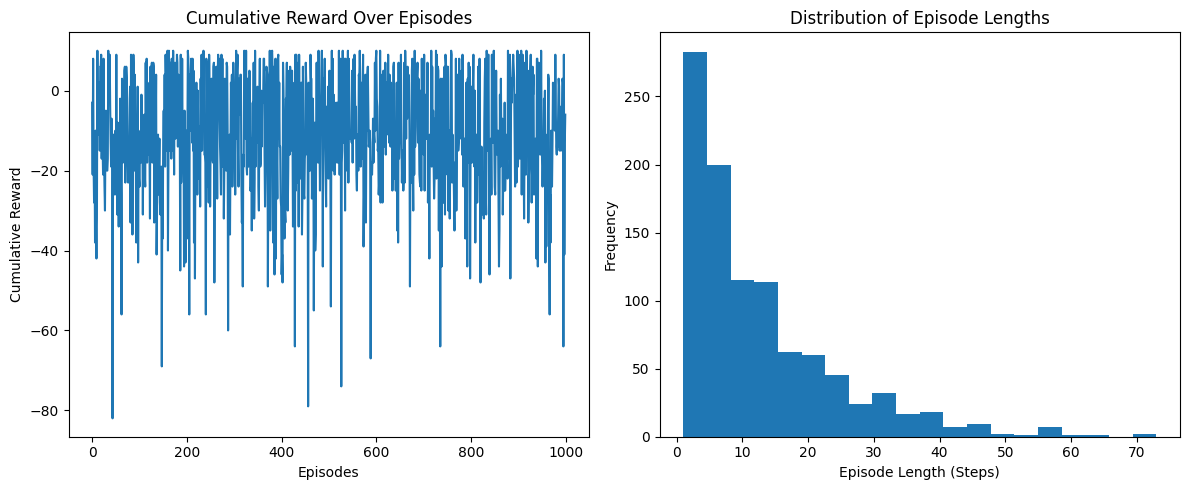

In [14]:
# Define the number of actions (up, down, left, right)
n_actions = 4
actions= []
def epsilon_greedy_action(Q_table, state, epsilon):
    # Epsilon-greedy strategy: with probability epsilon, take a random action (exploration)
    # otherwise take the action with the highest Q-value for the given state (exploitation)
    if np.random.rand() < epsilon:  # Exploration
        actions.append('explore')
        return np.random.randint(0, Q_table.shape[1])  # Random action
    else:  # Exploitation
        actions.append('exploit')
        return np.argmax(Q_table[state])  # Action with the highest Q-value

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate for epsilon-greedy policy

# Initialize the Q-table
Q_table = np.zeros((n_states, n_actions))

cumulative_rewards = [] # store commulative rewards
episode_lengths = []  # Store episode length

# Training loop
for episode in range(1000):
    total_reward = 0
    steps = 0
    state = np.random.randint(0, n_states)  # Start at random state
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)  # Random next state
        reward = rewards[next_state]
        total_reward += reward
        steps += 1

        # Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:  # End episode if goal or pitfall is reached
            done = True
    cumulative_rewards.append(total_reward)
    episode_lengths.append(steps)
# calculate success rate
success_count = sum(1 for reward in cumulative_rewards if reward >= 10)
success_rate = success_count/len(cumulative_rewards)

# Exploration Vs Exploitation ration
exploration_count = sum(1 for action in actions if action == 'explore')
exploitation_count = sum(1 for action in actions if action == 'exploit')
exploration_exploitation_ratio = exploration_count / (exploration_count + exploitation_count)

print(f"Success Rate: {success_rate * 100}%")
print(f"Exploration vs. Exploitation Ratio: {exploration_exploitation_ratio}")

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot cumulative rewards
axs[0].plot(cumulative_rewards)
axs[0].set_xlabel('Episodes')
axs[0].set_ylabel('Cumulative Reward')
axs[0].set_title('Cumulative Reward Over Episodes')

# Plot histogram of episode lengths
axs[1].hist(episode_lengths, bins=20)
axs[1].set_xlabel('Episode Length (Steps)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Episode Lengths')

# Adjust layout and display
plt.tight_layout()
plt.show()
